In [2]:
import sys
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
d = os.path.dirname(os.getcwd())
sys.path.insert(0, d)

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

from torchvision.datasets import CIFAR10
from torchvision import transforms
from torch.utils.data import DataLoader

from utils.train_utils import train, adv_train
from utils.trainer import ModelTrainer, plot_history
from models.wide_resnet import SparseWideResNet
from utils.attacks import pgd

In [4]:
# tr_transform = transforms.Compose([
#     transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor()
# ])
tr_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
])
vl_transform = transforms.Compose([
    transforms.ToTensor()
])

ds_train = CIFAR10('../data', train=True, download=True, transform=tr_transform)
ds_test = CIFAR10('../data', train=False, download=True, transform=vl_transform)

batch_size = 100
train_dl = DataLoader(ds_train, batch_size, shuffle=True)
valid_dl = DataLoader(ds_test, batch_size, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


### Sparse Wide-ResNet

**Natural training**

In [5]:
trainer = ModelTrainer(ds_train, ds_test, is_sparse=True, batch_size=100)

model = SparseWideResNet(depth=28, widen_factor=10, k_winners=0.1, num_classes=10)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', min_lr=1e-7, patience=2, verbose=True)

history = trainer.train(model, loss_fn, optimizer, scheduler, epochs=50, patience=4)
plot_history(history)
torch.save(model.state_dict(), "../saved/sparse_wide_resnet_trainer.pt")

KeyboardInterrupt: 

In [ ]:
trainer = ModelTrainer(ds_train, ds_test, is_sparse=True, batch_size=100)

model = SparseWideResNet(depth=28, widen_factor=10, k_winners=0.1, num_classes=10)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', min_lr=1e-7, patience=2, verbose=True)

params = {
    "epsilon": 8/255,
    "alpha": 2/255,
    "num_iter": 10,
}

history = trainer.adv_train(model, pgd, params, loss_fn, optimizer, scheduler, epochs=50, patience=4)
plot_history(history)
torch.save(model.state_dict(), "../saved/robust_sparse_wide_resnet_trainer.pt")

Epoch: 1 Validation Loss: 1.1145 accuracy: 0.6025, time: 0:06:22
Epoch: 2 Validation Loss: 0.9334 accuracy: 0.6705, time: 0:06:23
Epoch: 3 Validation Loss: 0.7700 accuracy: 0.7311, time: 0:06:23
Epoch: 4 Validation Loss: 0.7092 accuracy: 0.7514, time: 0:06:24
Epoch: 5 Validation Loss: 0.6124 accuracy: 0.7865, time: 0:06:23
Epoch: 6 Validation Loss: 0.5755 accuracy: 0.8030, time: 0:06:23
Epoch: 7 Validation Loss: 0.5234 accuracy: 0.8212, time: 0:06:23
Epoch: 8 Validation Loss: 0.5120 accuracy: 0.8277, time: 0:06:23
Epoch: 9 Validation Loss: 0.4946 accuracy: 0.8305, time: 0:06:23
Epoch: 10 Validation Loss: 0.4680 accuracy: 0.8403, time: 0:06:23
Epoch: 11 Validation Loss: 0.4643 accuracy: 0.8467, time: 0:06:23
Epoch: 12 Validation Loss: 0.4323 accuracy: 0.8517, time: 0:06:23
Epoch: 13 Validation Loss: 0.4262 accuracy: 0.8509, time: 0:06:23
Epoch: 14 Validation Loss: 0.4242 accuracy: 0.8607, time: 0:06:22
Epoch: 15 Validation Loss: 0.4243 accuracy: 0.8586, time: 0:06:23
epochs_no_improve: 

ValueError: x and y must have same first dimension, but have shapes (40,) and (33,)

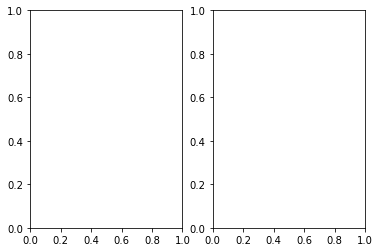

In [5]:
model = SparseWideResNet(depth=28, widen_factor=10, k_winners=0.1, num_classes=10).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', min_lr=1e-7, patience=2, verbose=True)

train(model, train_dl, valid_dl, loss_fn, optimizer, scheduler, epochs=40, sparse=True, device=device)
torch.save(model.state_dict(), "../saved/sparse_wide_resnet.pt")

Epoch: 1 Validation Loss: 1.1302 accuracy: 0.5964, time: 0:06:34
Epoch: 2 Validation Loss: 0.9377 accuracy: 0.6652, time: 0:06:35
Epoch: 3 Validation Loss: 0.7831 accuracy: 0.7271, time: 0:06:35
Epoch: 4 Validation Loss: 0.6998 accuracy: 0.7595, time: 0:06:35
Epoch: 5 Validation Loss: 0.6532 accuracy: 0.7712, time: 0:06:35
Epoch: 6 Validation Loss: 0.5873 accuracy: 0.7960, time: 0:06:35
Epoch: 7 Validation Loss: 0.5050 accuracy: 0.8235, time: 0:06:35
Epoch: 8 Validation Loss: 0.5040 accuracy: 0.8241, time: 0:06:35
Epoch: 9 Validation Loss: 0.4548 accuracy: 0.8439, time: 0:06:35
Epoch: 10 Validation Loss: 0.4522 accuracy: 0.8433, time: 0:06:35
Epoch: 11 Validation Loss: 0.4221 accuracy: 0.8547, time: 0:06:35
Epoch: 12 Validation Loss: 0.4034 accuracy: 0.8617, time: 0:06:35
Epoch: 13 Validation Loss: 0.3886 accuracy: 0.8638, time: 0:06:34
Epoch: 14 Validation Loss: 0.3792 accuracy: 0.8734, time: 0:06:34
Epoch: 15 Validation Loss: 0.3660 accuracy: 0.8781, time: 0:06:35
Epoch: 16 Validatio

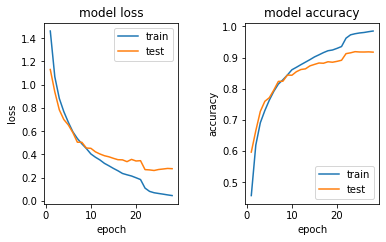

In [5]:
model = SparseWideResNet(depth=28, widen_factor=10, k_winners=0.2, num_classes=10).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', min_lr=1e-7, patience=2, verbose=True)

train(model, train_dl, valid_dl, loss_fn, optimizer, scheduler, epochs=40, sparse=True, device=device)
torch.save(model.state_dict(), "../saved/sparse_wide_resnet_02.pt")

Epoch: 1 Validation Loss: 1.2251 accuracy: 0.5585, time: 0:06:32
Epoch: 2 Validation Loss: 1.0019 accuracy: 0.6456, time: 0:06:33
Epoch: 3 Validation Loss: 0.8698 accuracy: 0.6983, time: 0:06:32
Epoch: 4 Validation Loss: 0.7774 accuracy: 0.7301, time: 0:06:33
Epoch: 5 Validation Loss: 0.7235 accuracy: 0.7457, time: 0:06:32
Epoch: 6 Validation Loss: 0.6685 accuracy: 0.7669, time: 0:06:33
Epoch: 7 Validation Loss: 0.6181 accuracy: 0.7837, time: 0:06:32
Epoch: 8 Validation Loss: 0.5972 accuracy: 0.7898, time: 0:06:32
Epoch: 9 Validation Loss: 0.5649 accuracy: 0.8082, time: 0:06:31
Epoch: 10 Validation Loss: 0.5584 accuracy: 0.8039, time: 0:06:32
Epoch: 11 Validation Loss: 0.5274 accuracy: 0.8192, time: 0:06:32
Epoch: 12 Validation Loss: 0.5222 accuracy: 0.8208, time: 0:06:31
Epoch: 13 Validation Loss: 0.4895 accuracy: 0.8336, time: 0:06:32
Epoch: 14 Validation Loss: 0.4735 accuracy: 0.8377, time: 0:06:31
Epoch: 15 Validation Loss: 0.5184 accuracy: 0.8213, time: 0:06:31
epochs_no_improve: 

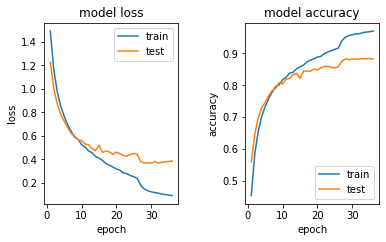

In [6]:
model = SparseWideResNet(depth=28, widen_factor=10, k_winners=0.05, num_classes=10).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', min_lr=1e-7, patience=2, verbose=True)

train(model, train_dl, valid_dl, loss_fn, optimizer, scheduler, epochs=40, sparse=True, device=device)
torch.save(model.state_dict(), "../saved/sparse_wide_resnet_005.pt")

**Adversarial training**

In [5]:
attack_params = {
    "epsilon": 8/225,
    "alpha": 2/255,
    "num_iter": 10
}

Epoch: 1 Validation Loss: 1.4437 accuracy: 0.4815, time: 1:09:04                
Epoch: 2 Validation Loss: 1.2470 accuracy: 0.5605, time: 1:09:09                
Epoch: 3 Validation Loss: 1.1410 accuracy: 0.5940, time: 1:09:23                
Epoch: 4 Validation Loss: 1.0582 accuracy: 0.6192, time: 1:09:25                
Epoch: 5 Validation Loss: 1.0091 accuracy: 0.6444, time: 1:09:23                
Epoch: 6 Validation Loss: 0.8916 accuracy: 0.6806, time: 1:09:27                
Epoch: 7 Validation Loss: 0.8672 accuracy: 0.6932, time: 1:09:30                
Epoch: 8 Validation Loss: 0.8549 accuracy: 0.7005, time: 1:09:34                
Epoch: 9 Validation Loss: 0.8538 accuracy: 0.6981, time: 1:09:38                
Epoch: 10 Validation Loss: 0.8976 accuracy: 0.6858, time: 1:09:40               
epochs_no_improve: 1/4
Epoch: 11 Validation Loss: 0.7477 accuracy: 0.7404, time: 1:09:44               
Epoch: 12 Validation Loss: 0.8352 accuracy: 0.7127, time: 1:09:39               
epoch

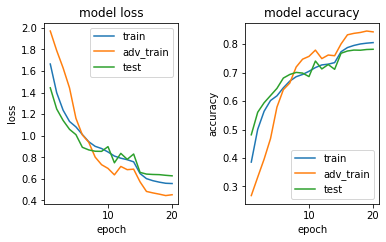

In [6]:
model = SparseWideResNet(depth=28, widen_factor=10, k_winners=0.1, num_classes=10).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', min_lr=1e-7, patience=2, verbose=True)

adv_train(model, pgd, attack_params, train_dl, valid_dl, loss_fn, optimizer, scheduler,
          epochs=20, sparse=True, device=device)
torch.save(model.state_dict(), "../saved/robust_sparse_wide_resnet.pt")